# Algorytm symulowanego wyżarzania

Autor: Adam Szreter, wt. 17.50

## Problem komiwojażera

In [1]:
import random
import math
from matplotlib import pyplot as plt
import numpy as np

In [9]:
#funkcje pomocnicze

def distance(points, i, j):
    return ((points[i][0] - points[j][0]) ** 2 + (points[i][1] - points[j][1]) ** 2) ** (1/2)

def showTrack(points, permutation):
    X = [points[index][0] for index in permutation]
    Y = [points[index][1] for index in permutation]
    plt.scatter(X, Y)
    plt.plot(X, Y)
    plt.show()

def plotTotalDistanceTrack(totalDistanceTrack):
    X = [i for i in range(len(totalDistanceTrack))]
    plt.plot(X, totalDistanceTrack)
    plt.show()
    
def totalDistance(points, permutation):
    totalDistance = 0
    for i in range(len(points)):
        totalDistance += distance(points, permutation[i-1], permutation[i])
    return totalDistance

def differenceInDistanceIfSwapped(i, j, points, permutation):
    oldDistance = distance(points, permutation[i-1], permutation[i]) \
                    + distance(points, permutation[i], permutation[(i+1) % len(permutation)]) \
                    + distance(points, permutation[j-1], permutation[j]) \
                    + distance(points, permutation[j], permutation[(j+1) % len(permutation)])
    swapPoints(i, j, permutation)
    newDistance = distance(points, permutation[i-1], permutation[i]) \
                    + distance(points, permutation[i], permutation[(i+1) % len(permutation)]) \
                    + distance(points, permutation[j-1], permutation[j]) \
                    + distance(points, permutation[j], permutation[(j+1) % len(permutation)])
    swapPoints(i, j, permutation)
    return newDistance - oldDistance

def swapPoints(i, j, permutation):
    permutation[i], permutation[j] = permutation[j], permutation[i]
    
def shouldSwapPoints(difference, T, T0):
    return difference < 0 or random.random() < probability(T, T0)

In [8]:
#funkcje stnowiace parametry algorytmu
def probability(T, T0):
    return math.exp(-((T0/T) ** 3))

def lowerTemperature(T):
    return T - 0.1

#def lowerTemperature(T):
#    return T/1.000005

def arbitrarySwap(n, i, j):
    i = random.randint(0, n-1)
    j = random.randint(0, n-1)
    while i == j:
        j = random.randint(0, n-1)
    return i, j

def consecutiveSwap(n, i, j):
    return (i + 1) % n, (j + 1) % n

def uniformDistribution(n, L):
    points = set()
    while len(points) < n:
        points.add((random.randint(0, L), random.randint(0, L)))
    points = list(points)
    permutation = [i for i in range(n)]
    return points, permutation

def normalDistribution(n, L):
    points = set()
    params = [((L // 2, L // 4), L // 20), ((L // 4, L // 2), L // 15), \
              ((3 * L // 4, L // 2), L // 10), ((L // 2, 3 * L // 4), L // 8)]
    for center, sd in params:
        locPoints = set()
        while len(locPoints) < n / len(params):
            point = (tuple(np.random.normal(np.array(center), sd)))
            if point[0] >= 0 and point[1] >= 0 and point[0] < L and point[1] < L:
                locPoints.add(point)
        points = points | locPoints
    points = list(points)
    permutation = [i for i in range(n)]
    return points, permutation
        
def separateGroups(n, L):
    points = set()
    while len(points) < n / 4:
        points.add((random.randint(0, L//3), random.randint(0, L//3)))
    while len(points) < n / 2:
        points.add((random.randint(2*L//3, L), random.randint(0, L//3)))
    while len(points) < 3*n / 4:
        points.add((random.randint(0, L//3), random.randint(2*L//3, L)))
    while len(points) < n:
        points.add((random.randint(2*L//3, L), random.randint(2*L//3, L)))
    points = list(points)
    permutation = [i for i in range(n)]
    return points, permutation

In [10]:
def simulatedAnnealing(points, permutation, T, iterationLimit, noChangeLimit, choosePointsToSwap):
    iterationsWithNoChange = 0 # number of iterations that brought no change to the result, one of the stop conditions
    numberOfIterations = 0
    totalDistanceTrack = []
    T0 = T
    i = 0
    j = 1
    while T > 0 and iterationsWithNoChange < noChangeLimit and numberOfIterations < iterationLimit:
        i, j = choosePointsToSwap(len(points), i, j)
        difference = differenceInDistanceIfSwapped(i, j, points, permutation)
        if shouldSwapPoints(difference, T, T0):
            iterationsWithNoChange = 0
            swapPoints(i, j, permutation)
        else:
            iterationsWithNoChange += 1
        T = lowerTemperature(T)
        numberOfIterations += 1
        totalDistanceTrack.append(totalDistance(points, permutation))
    
    return permutation, totalDistanceTrack

def solveAndVisualize(n, L, T, iterationLimit, noChangeLimit, swapMethod, generationMethod):
    points, permutation = generationMethod(n, L)
    showTrack(points, permutation)
    print("total distance: ", totalDistance(points, permutation))
    permutation, totalDistanceTrack = simulatedAnnealing(points, permutation, T, iterationLimit, noChangeLimit, swapMethod)
    showTrack(points, permutation)
    print("total distance: ", totalDistance(points, permutation))
    plotTotalDistanceTrack(totalDistanceTrack)

### Pierwsze testy

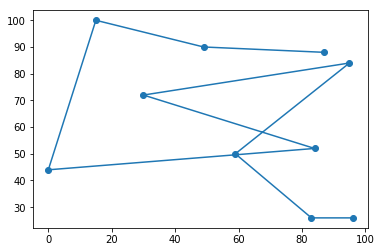

total distance:  498.6386612900957


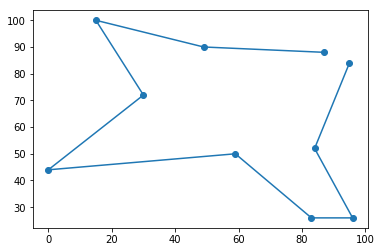

total distance:  323.95720305773744


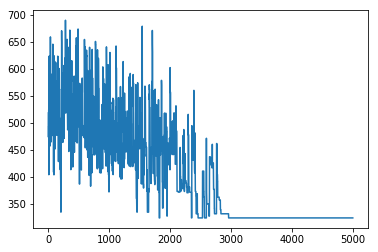

In [96]:
n = 10
L = 100
T = 500.0
iterationLimit = 10000
noChangeLimit = 10000
solveAndVisualize(n, L, T, iterationLimit, noChangeLimit, arbitrarySwap, uniformDistribution)

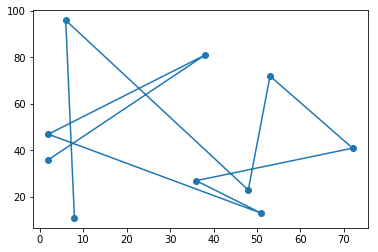

total distance:  506.49823821524336


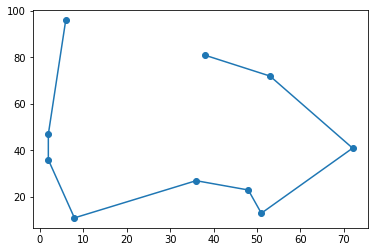

total distance:  265.4047303243467


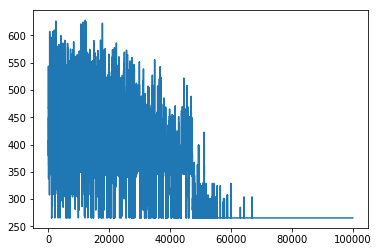

In [104]:
n = 10
L = 100
T = 10000.0
iterationLimit = 1000000
noChangeLimit = 1000000
solveAndVisualize(n, L, T, iterationLimit, noChangeLimit, consecutiveSwap, uniformDistribution)

Powyższe dwie symulacje pokazują, że zimplementowany algorytm działa i dla małej liczby punktów znajduje optymalne rozwiązanie. Wykresy zmian energii układu w funkcji liczby iteracji algorytmu pokazują wyraźnie lepszy przebieg dla losowego dobierania rozpatrywanych punktów (arbitrary swap) względem zamieniania punktów sąsiadujących (consecutive swap) - w tym drugim przypadku amplituda zmian jest wyraźnie większa.

### Rozkład jednorodny

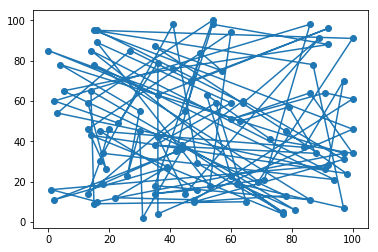

total distance:  5088.7296985248195


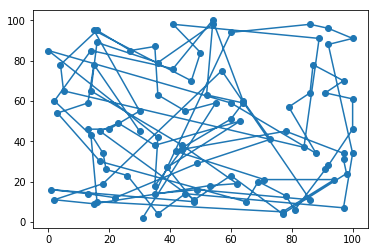

total distance:  2627.151521937956


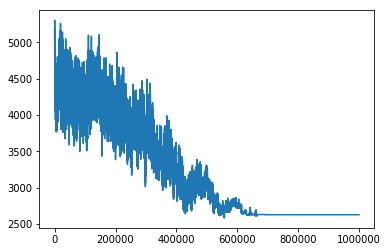

In [105]:
n = 100
L = 100
T = 100000.0
iterationLimit = 1000000
noChangeLimit = 1000000
solveAndVisualize(n, L, T, iterationLimit, noChangeLimit, consecutiveSwap, uniformDistribution)

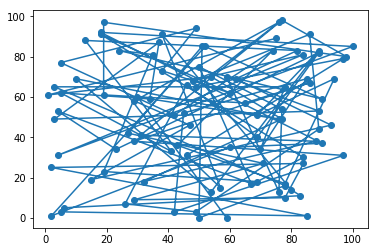

total distance:  5353.393031924433


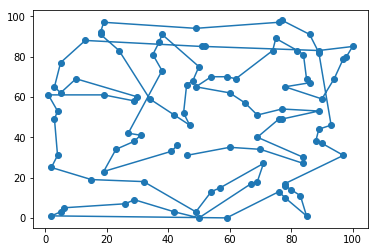

total distance:  1134.6915415289945


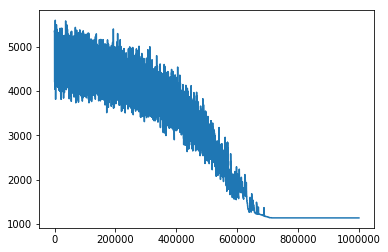

In [149]:
n = 100
L = 100
T = 100000.0
iterationLimit = 1000000
noChangeLimit = 1000000
solveAndVisualize(n, L, T, iterationLimit, noChangeLimit, arbitrarySwap, uniformDistribution)

Przy znacznie większej niż poprzednio liczbie punktów rozmiszczonych na płaszczyźnie zgodnie z rozkładem jednorodnym, przewaga wyboru punktów na zasadzie _arbitrary swap_ uwidacznia się jeszcze bardziej - wskazuje na nią już nie tylko znacznie ładniejszy przebieg funkcji energii, ale też znacząca różnica w jakości wyników. W żadnej z symulacji nie wyznaczono minimum globalnego, wyraźnie widać jednak, że rozwiązanie znalezione w drugiej z nich (_arbitrary swap_) jest mu w miarę bliskie, podczas gdy w pierwszej z nich (_consecutive swap_) udało się zaledwie nieco ograniczyć chaos początkowej, losowo wyznaczonej ścieżki.

### Rozkład normalny

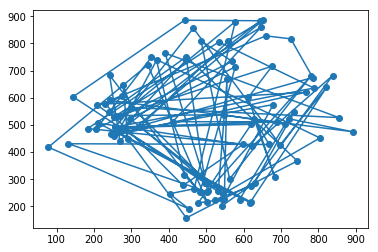

total distance:  33780.0615590994


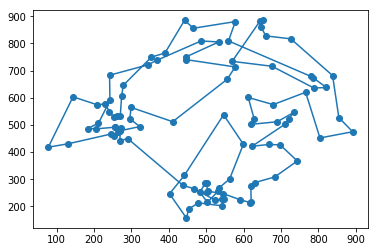

total distance:  6707.609690696671


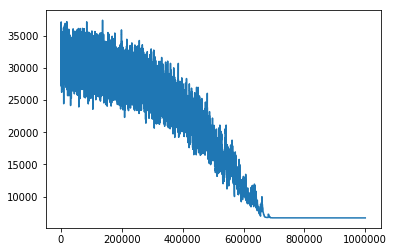

In [97]:
n = 100
L = 1000
T = 100000.0
iterationLimit = 1000000
noChangeLimit = 1000000
solveAndVisualize(n, L, T, iterationLimit, noChangeLimit, arbitrarySwap, normalDistribution)

Dobór punktów w szczególny sposób - zgodnie z rozkładem normalnym dla czterech różnych wartości średniej i odchylenia standardowego - ewidentnie sprzyja zbieżności algorytmu, który osiągnął znacznie lepszy rezulat niż dla punktów rozłożonych na całej płaszczyźnie zgodnie z rozkładem jednorodnym. Ładny przebieg funkcji energii sugeruje, że algorytm zadziałał prawidłowo i mógł znaleźć rozwiązanie bliskie optimuum, co potwierdza w miarę dobry wizualnie przebieg obliczonej trasy.

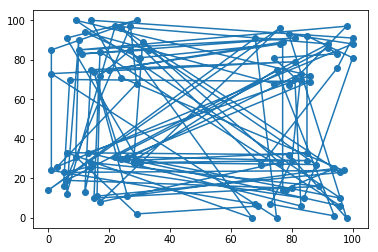

total distance:  6105.735983924907


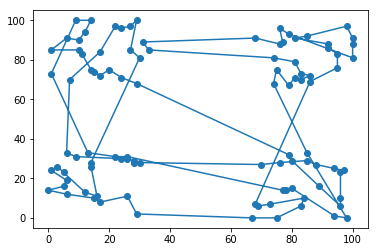

total distance:  1138.249675427639


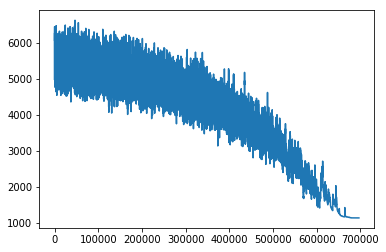

In [82]:
n = 100
L = 100
T = 100000.0
iterationLimit = 1000000
noChangeLimit = 10000
solveAndVisualize(n, L, T, iterationLimit, noChangeLimit, arbitrarySwap, separateGroups)

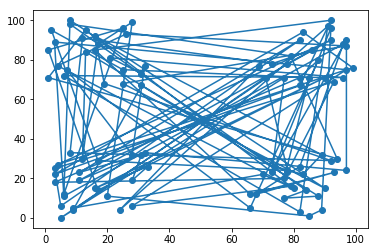

total distance:  6418.656010744765


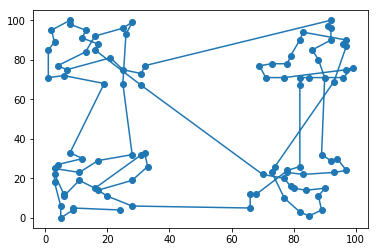

total distance:  1081.5672564156398


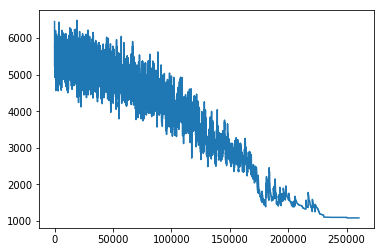

In [13]:
n = 100
L = 100
T = 1000000.0
iterationLimit = 10000000
noChangeLimit = 10000
solveAndVisualize(n, L, T, iterationLimit, noChangeLimit, arbitrarySwap, separateGroups)

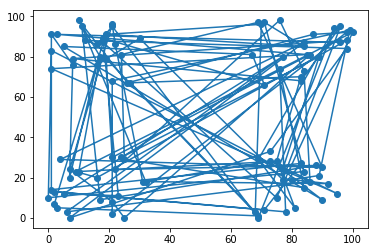

total distance:  6335.8940889969645


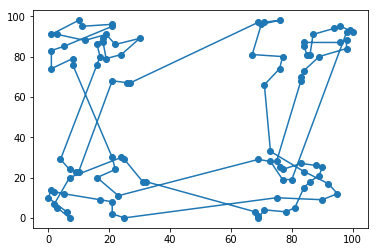

total distance:  1028.2400112606942


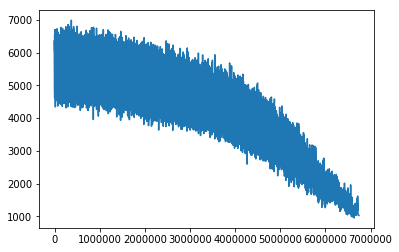

In [6]:
n = 100
L = 100
T = 1000000.0
iterationLimit = 10000000
noChangeLimit = 10000
solveAndVisualize(n, L, T, iterationLimit, noChangeLimit, arbitrarySwap, separateGroups)

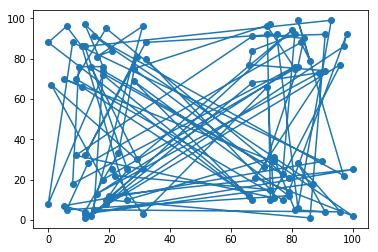

total distance:  5618.26914653698


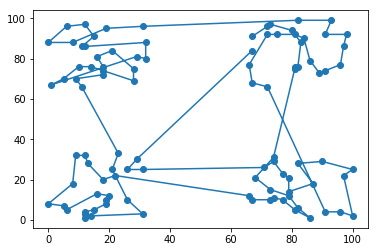

total distance:  1013.6817847839311


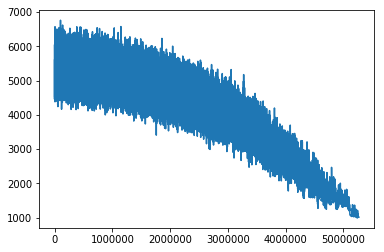

In [11]:
n = 100
L = 100
T = 1000000.0
iterationLimit = 10000000
noChangeLimit = 10000
solveAndVisualize(n, L, T, iterationLimit, noChangeLimit, arbitrarySwap, separateGroups)

## Obraz binarny

In [2]:
from itertools import product
import random
from matplotlib import pyplot as plt
import matplotlib
import numpy as np
import math

In [3]:
def decide(probability):
    return random.random() < probability

def randomPoint(n):
    return random.randint(0, n-1), random.randint(0, n-1)

def swapImPoints(y1, x1, y2, x2, image):
    image[y1][x1], image[y2][x2] = image[y2][x2], image[y1][x1]
    
def generateImage(n, density):
    image = np.ones([n, n])
    for i in range(n):
        for j in range(n):
            if decide(density):
                image[i][j] = 0
    return image

def displayImage(values):
    values = values*255
    plt.imshow(values, cmap=matplotlib.cm.gray, vmin=0, vmax=255)
    plt.show()

In [4]:
def localEnergy(y, x, energyFunc, neighbours, image):
    energy = 0
    for n_y, n_x in neighbours(y, x, image): # energia wiązań ze strony zmienianego punktu
        energy += energyFunc(y, x, n_y, n_x)
    originalColor = image[y][x]
    image[y][x] = 0
    for n_y, n_x in neighbours(y, x, image): # energia wiązań ze strony sąsiadów
        energy += energyFunc(n_y, n_x, y, x)
    image[y][x] = originalColor
    return energy

def totalImageEnergy(image, energyFunc, neighbours):
    totalEnergy = 0
    for y in range(len(image)):
        for x in range(len(image)):
            for n_y, n_x in neighbours(y, x, image):
                totalEnergy += energyFunc(y, x, n_y, n_x)
    return totalEnergy

def probability(T, T0):
    return math.exp(-((T0/T) ** 2))

def lowerTemperature(T):
    return T - 1

def plotTotalEnergyTrack(totalEnergyTrack):
    X = [i for i in range(len(totalEnergyTrack))]
    plt.plot(X, totalEnergyTrack)
    plt.show()

In [5]:
def binSimulatedAnnealing(image, energyFunc, neighbours, T0, iterationLimit, noChangeLimit):
    iterationsWithNoChange = 0
    numberOfIterations = 0
    totalEnergyTrack = [totalImageEnergy(image, energyFunc, neighbours)]
    T = T0
    i = 0
    j = 0
    while T > 0 and iterationsWithNoChange < noChangeLimit and numberOfIterations < iterationLimit:
        i1, j1 = randomPoint(len(image))    # biały punkt
        #while not image[i1][j1]:
        #    i1, j1 = randomPoint(len(image))
        i2, j2 = randomPoint(len(image))    # czarny punkt
        while image[i2][j2] == image[i1][j1]:
            i2, j2 = randomPoint(len(image))
        energyDifference = localEnergy(i1, j1, energyFunc, neighbours, image) \
                            - localEnergy(i2, j2, energyFunc, neighbours, image)
        if not image[i1][j1]:
            energyDifference = - energyDifference
        if energyDifference < 0 or decide(probability(T, T0)):
            swapImPoints(i1, j1, i2, j2, image)
            totalEnergyTrack.append(totalEnergyTrack[-1] + energyDifference)
            iterationsWithNoChange = 0
        else:
            iterationsWithNoChange += 1
            totalEnergyTrack.append(totalEnergyTrack[-1])
        T = lowerTemperature(T)
        numberOfIterations += 1
    
    return image, totalEnergyTrack

def optimizeAndVisualize(n, density, T0, iterationLimit, noChangeLimit, energyFunc, neighbourhoodType):
    image = generateImage(n, density)
    displayImage(image)
    print(totalImageEnergy(image, energyFunc, neighbourhoodType))
    image2, totalEnergyTrack = binSimulatedAnnealing(image, energyFunc, neighbourhoodType, T0, iterationLimit, noChangeLimit)
    displayImage(image2)
    print(totalImageEnergy(image, fullConstantAttraction, simple4))
    plotTotalEnergyTrack(totalEnergyTrack)

#### Funkcje energii:

In [6]:
def fullConstantAttraction(y1, x1, y2, x2):
    return 1

def closePosDistantNeg(y1, x1, y2, x2):
    disSq = (y1 - y2) ** 2 + (x1 - x2) ** 2
    return disSq * (4 - disSq)

def distanceSquared(y1, x1, y2, x2):
    return (y1 - y2) ** 2 + (x1 - x2) ** 2

#### Funkcje określające sąsiedztwo:

In [7]:
def simple4(y, x, image):
    neighbours = []
    if x - 1 >= 0 and not image[y][x-1]:
        neighbours.append((y, x-1))
    if x + 1 < len(image) and not image[y][x+1]:
        neighbours.append((y, x+1))
    if y - 1 >= 0 and not image[y-1][x]:
        neighbours.append((y-1, x))
    if y + 1 < len(image) and not image[y+1][x]:
        neighbours.append((y+1, x))
    return neighbours

def simple8(y, x, image):
    neighbours = [(y-1, x-1), (y-1, x), (y-1, x+1), (y, x-1), (y, x+1), (y+1, x-1), (y+1, x), (y+1, x+1)]
    neighbours = [p for p in neighbours if p[0] >= 0 and p[1] >= 0 and p[0] < len(image) and p[1] < len(image)]
    return neighbours

def simple16(y, x, image):
    neighbours = [(y + i, x + j) for i in [-2, -1, 0, 1, 2] for j in [-1, 0, 1]]
    for i in [-1, 0, 1]:
        for j in [-2, 2]:
            neighbours.append((y + 1, x + j))
    neighbours = [p for p in neighbours if p[0] >= 0 and p[1] >= 0 and p[0] < len(image) and p[1] < len(image)]
    return neighbours

def rightAndUpper(y, x, image):
    neighbours = [(y-1, x-1), (y-1, x), (y-1, x+1), (y, x+1), (y+1, x+1)]
    neighbours = [p for p in neighbours if p[0] >= 0 and p[1] >= 0 and p[0] < len(image) and p[1] < len(image)]
    return neighbours

def longCross(y, x, image):
    neighbours = [(y-2, x), (y-1, x), (y+1, x), (y+2, x), (y, x-2), (y, x-1), (y, x+1), (y, x+2)]
    neighbours = [p for p in neighbours if p[0] >= 0 and p[1] >= 0 and p[0] < len(image) and p[1] < len(image)]
    return neighbours

### Przykłady działania

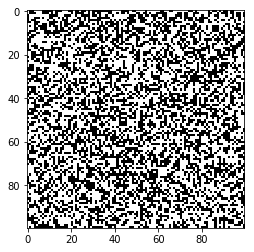

17981


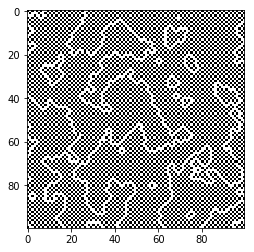

18000


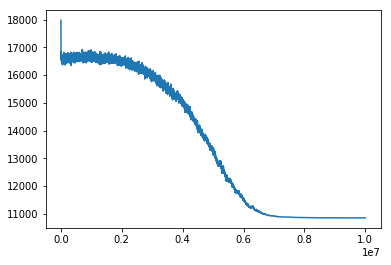

In [8]:
n = 100
density = 0.45
T0 = 10000000
iterationLimit = 10000000
noChangeLimit = 10000000
optimizeAndVisualize(n, density, T0, iterationLimit, noChangeLimit, fullConstantAttraction, simple4)

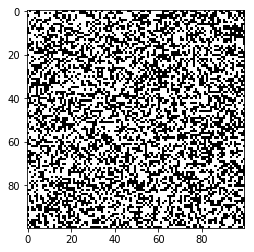

78804


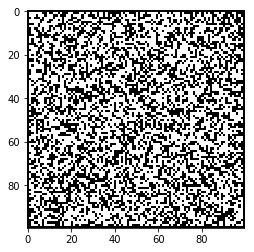

17576


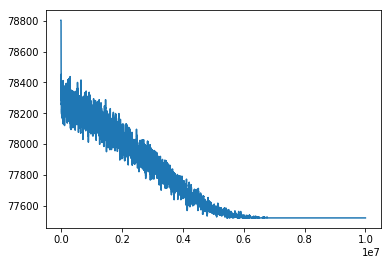

In [17]:
n = 100
density = 0.45
T0 = 10000000
iterationLimit = 10000000
noChangeLimit = 10000000
optimizeAndVisualize(n, density, T0, iterationLimit, noChangeLimit, fullConstantAttraction, simple8)

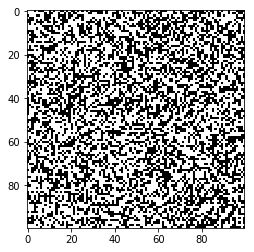

49203


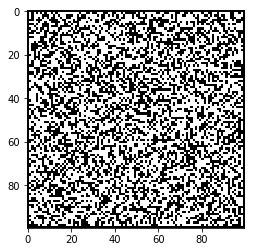

17684


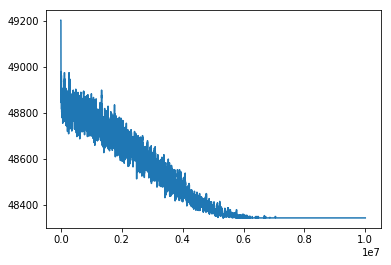

In [16]:
n = 100
density = 0.45
T0 = 10000000
iterationLimit = 10000000
noChangeLimit = 10000000
optimizeAndVisualize(n, density, T0, iterationLimit, noChangeLimit, fullConstantAttraction, rightAndUpper)

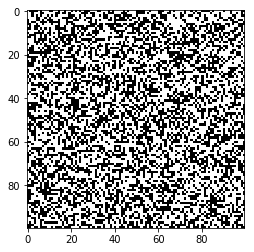

275616


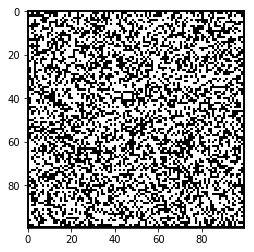

17700


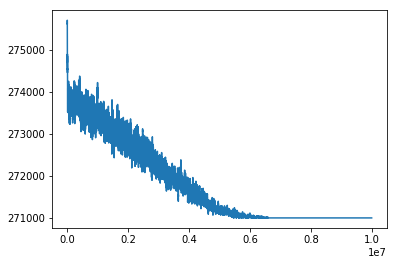

In [14]:
n = 100
density = 0.45
T0 = 10000000
iterationLimit = 10000000
noChangeLimit = 10000000
optimizeAndVisualize(n, density, T0, iterationLimit, noChangeLimit, closePosDistantNeg, simple8)

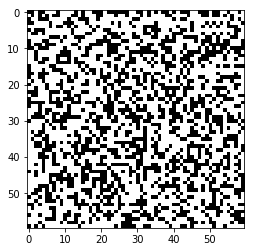

27966


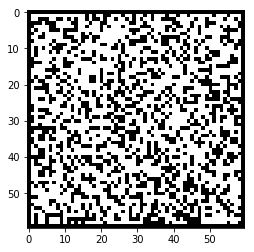

5492


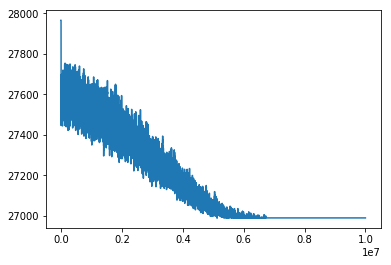

In [13]:
n = 60
density = 0.4
T0 = 10000000
iterationLimit = 10000000
noChangeLimit = 10000000
optimizeAndVisualize(n, density, T0, iterationLimit, noChangeLimit, distanceSquared, rightAndUpper)

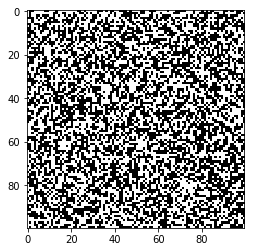

681508


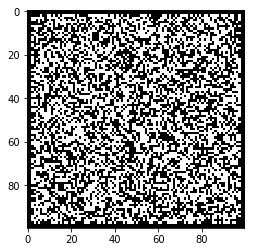

19708


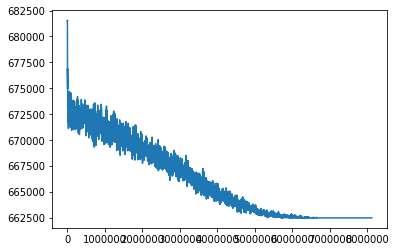

In [12]:
n = 100
density = 0.5
T0 = 10000000
iterationLimit = 10000000
noChangeLimit = 1000000
optimizeAndVisualize(n, density, T0, iterationLimit, noChangeLimit, distanceSquared, simple16)

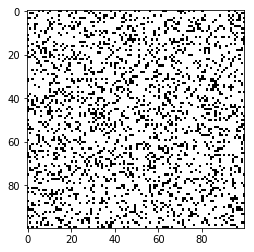

681508


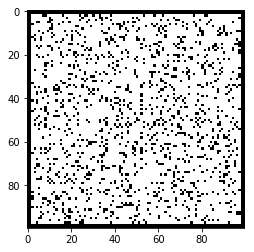

7832


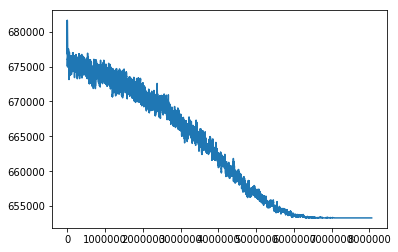

In [15]:
n = 100
density = 0.2
T0 = 10000000
iterationLimit = 10000000
noChangeLimit = 1000000
optimizeAndVisualize(n, density, T0, iterationLimit, noChangeLimit, distanceSquared, simple16)

Zastosowanie różnych funkcji energii oraz różnych strategii określania sąsiedztwa powinno poskutkować powstaniem obrazów o zróżnicowanych cechach. Pomimo licznych prób dla różnych kombinacji parametrów, jedyną wyróżniającą się wersją pozostaje sąsiedztwo simple4 ze stałą funkcjąenergii, produkujące bardzo regularny obraz; pozostałe konfiguracje tworzą z grubsza losowy obraz, z zauważanym skupieniem punktów na obwodzie. Przyczyny takiego stanu rzeczy można upatrywać w przebiegu funkcji energii całkowitej obrazka - ma on kształt klasycznie dobry dla algorytmu symulowanego wyrzażania w pierwszym przypadku, i nie najlepszy w pozostałych. Być może ma to związek z większą złożonością zależności opisywanych przez kolejne funkcje - dobra ich wizualizacja może wyagać znacząco większej liczby iteracji, przy której jednak czas obliczeń na wykorzystanej maszynie staje się trudny do zaakceptowania.

## Sudoku

In [19]:
from itertools import product
import random
from matplotlib import pyplot as plt
import matplotlib
import numpy as np
import math

In [20]:
def loadSudoku(filename):
    convert = lambda ch: 0 if ch == 'x' else int(ch)
    with open(filename) as sourceFile:
        sudoku = [[convert(ch) for ch in line if ch != '\n'] for line in sourceFile.readlines()]
    modifiableMask = [[e == 0 for e in row] for row in sudoku]
    return sudoku, modifiableMask

def decide(probability):
    return random.random() < probability

def block(y, x, sudoku):
    return [sudoku[y - (y % 3) + i][x - (x % 3) + j] for i in range(3) for j in range(3)]

def column(y, x, sudoku):
    return [row[x] for row in sudoku]

def row(y, x, sudoku):
    return sudoku[y]

def affectedFields(y, x, sudoku):
    return row(y, x, sudoku) + column(y, x, sudoku) + block(y, x, sudoku)

def plotTotalEnergyTrack(totalEnergyTrack):
    X = [i for i in range(len(totalEnergyTrack))]
    plt.plot(X, totalEnergyTrack)
    plt.show()
    
def initialEnergy(sudoku):
    return sum([costOfNumber(y, x, sudoku) for y in range(len(sudoku)) for x in range(len(sudoku))])

In [21]:
def validateSudoku(sudoku):
    for row in sudoku:
        if len(set(row)) != 9:
            return False
    for i in range(len(sudoku)):
        group = set()
        for row in sudoku:
            group.add(row[i])
        if len(group) != 9:
            return False
    for b in [block(i, j, sudoku) for i in [0,3,6] for j in [0,3,6]]:
        if len(set(b)) != 9:
            return False
    return True

In [22]:
def randomPair(mask):
    y = random.randint(0, 8)
    while (mask[y].count(True) < 2):
        y = random.randint(0, 8)
    x1 = random.randint(0, 8)
    while not mask[y][x1]:
        x1 = random.randint(0, 8)
    x2 = random.randint(0, 8)
    while x1 == x2 or not mask[y][x2]:
        x2 = random.randint(0, 8)
    return y, x1, x2

def costOfNumberR(y, x, sudoku, n=0):
    if n == 0:
        n = sudoku[y][x]
    cost = column(y, x, sudoku).count(n) + block(y, x, sudoku).count(n)
    if n == sudoku[y][x]:
        return cost - 2
    else:
        return cost

def probability(T, T0, diff):
    return (T/T0) / (diff ** 2)
    
def totalCost(sudoku):
    return sum([costOfNumberR(y, x, sudoku) for y in range(len(sudoku)) for x in range(len(sudoku[y]))])

def addNumber(n, y, sudoku):
    x = 0
    while sudoku[y][x] != 0:
        x += 1
    sudoku[y][x] = n

def fill(sudoku):
    for y, row in enumerate(sudoku):
        for i in range(9):
            if i + 1 not in row:
                addNumber(i + 1, y, sudoku)

def suMoSimulatedAnnealing(sudoku, mask, T0, iterationLimit, noChangeLimit):
    fill(sudoku)
    iterationsWithNoChange = 0
    numberOfIterations = 0
    totalEnergyTrack = [totalCost(sudoku)]
    bestSudoku = sudoku
    T = T0
    y = 0
    x = 0
    n = 1
    lowestEnergy = totalEnergyTrack[-1]
    while lowestEnergy > 0 and T > 0 and iterationsWithNoChange < noChangeLimit and numberOfIterations < iterationLimit:
        y, x1, x2 = randomPair(mask)
        cost = costOfNumberR(y, x1, sudoku, sudoku[y][x2]) + costOfNumberR(y, x2, sudoku, sudoku[y][x1]) \
                - costOfNumberR(y, x1, sudoku) - costOfNumberR(y, x2, sudoku)
        if cost <= 0 or decide(probability(T, T0, cost)):
            sudoku[y][x1], sudoku[y][x2] = sudoku[y][x2], sudoku[y][x1]
            totalEnergyTrack.append(totalCost(sudoku))
            iterationsWithNoChange = 0
            if totalEnergyTrack[-1] < lowestEnergy:
                lowestEnergy = totalEnergyTrack[-1]
                bestSudoku = sudoku
        else:
            iterationsWithNoChange += 1
            totalEnergyTrack.append(totalEnergyTrack[-1])
        T = lowerTemperature(T, T0)
        numberOfIterations += 1
    print('Najnizsza energia:', lowestEnergy)
    
    return bestSudoku, totalEnergyTrack

def solveMoSudoku(sudoku, mask, T0, iterationLimit, noChangeLimit):
    print(np.matrix(sudoku))
    sudoku, totalEnergyTrack = suMoSimulatedAnnealing(sudoku, mask, T0, iterationLimit, noChangeLimit)
    plotTotalEnergyTrack(totalEnergyTrack)
    print(np.matrix(sudoku))
    print('Sudoku rozwiazane:', validateSudoku(sudoku))

### Przykład działania

[[0 0 3 0 2 0 6 0 0]
 [9 0 0 3 0 5 0 0 1]
 [0 0 1 8 0 6 4 0 0]
 [0 0 8 1 0 2 9 0 0]
 [7 0 0 0 0 0 0 0 8]
 [0 0 6 7 0 8 2 0 0]
 [0 0 2 6 0 9 5 0 0]
 [8 0 0 2 0 3 0 0 9]
 [0 0 5 0 1 0 3 0 0]]
Najnizsza energia: 0


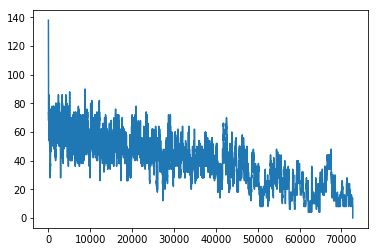

[[4 8 3 9 2 1 6 5 7]
 [9 6 7 3 4 5 8 2 1]
 [2 5 1 8 7 6 4 9 3]
 [5 4 8 1 3 2 9 7 6]
 [7 2 9 5 6 4 1 3 8]
 [1 3 6 7 9 8 2 4 5]
 [3 7 2 6 8 9 5 1 4]
 [8 1 4 2 5 3 7 6 9]
 [6 9 5 4 1 7 3 8 2]]
Sudoku rozwiazane: True


In [23]:
def lowerTemperature(T, T0):
    return T * 0.999968

T0 = 400000
iterationLimit = 200000
noChangeLimit = 40000

sudoku, mask = loadSudoku('sudoku.txt')
solveMoSudoku(sudoku, mask, T0, iterationLimit, noChangeLimit)

### Trudne sudoku
Źródło: https://curiosity.com/topics/a-finnish-mathematician-claimed-that-this-is-the-most-difficult-sudoku-puzzle-in-the-world-curiosity/

[[8 0 0 0 0 0 0 0 0]
 [0 0 3 6 0 0 0 0 0]
 [0 7 0 0 9 0 2 0 0]
 [0 5 0 0 0 7 0 0 0]
 [0 0 0 0 4 5 7 0 0]
 [0 0 0 1 0 0 0 3 0]
 [0 0 1 0 0 0 0 6 8]
 [0 0 8 5 0 0 0 1 0]
 [0 9 0 0 0 0 4 0 0]]
Najnizsza energia: 4


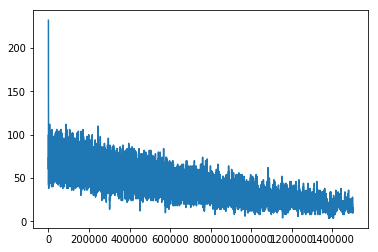

[[8 2 9 4 7 1 6 5 3]
 [4 1 3 6 5 2 8 9 7]
 [6 7 5 8 9 3 2 4 1]
 [3 5 2 9 6 7 1 8 4]
 [9 8 1 3 4 5 7 2 6]
 [7 6 4 1 8 2 5 3 9]
 [5 3 1 7 2 4 9 6 8]
 [7 4 8 5 6 9 3 1 2]
 [2 9 6 1 3 8 4 7 5]]
Sudoku rozwiazane: False


In [27]:
def lowerTemperature(T, T0):
    return T * 0.9999976

T0 = 40
iterationLimit = 1500000
noChangeLimit = 40000

sudoku, mask = loadSudoku('sudoku_diff.txt')
solveMoSudoku(sudoku, mask, T0, iterationLimit, noChangeLimit)

### Większa liczba przykładów

In [25]:
def loadSudokuList(fileName):
    with open(fileName) as sourceFile:
        sudokus = sourceFile.readlines()
    digits = '0123456789'
    sudokuList = []
    i = 0
    sudoku = []
    mask = []
    for line in sudokus:
        if line[0] in digits:
            i += 1
            sudoku.append([int(x) for x in line if x != '\n'])
            mask.append([x == '0' for x in line if x != '\n'])
            if i == 9:
                i = 0
                sudokuList.append((sudoku, mask))
                sudoku = []
                mask = []
    return sudokuList

In [143]:
def lowerTemperature(T, T0):
    return T * 0.999967

sudokuList = loadSudokuList('sudoku_set1.txt')
goodCount = 0
badCount = 0
T0 = 200000
iterationLimit = 200000
noChangeLimit = 40000
for sudoku, mask in sudokuList:
    sudoku, energyTrack = suMoSimulatedAnnealing(sudoku, mask, T0, iterationLimit, noChangeLimit)
    if energyTrack[-1] == 0:
        goodCount += 1
    else:
        badCount += 1
print('Good:', goodCount, 'bad:', badCount)

Good: 4 bad: 6


In [28]:
def lowerTemperature(T, T0):
    return T * 0.9999976

sudokuList = loadSudokuList('sudoku_set1.txt')
T0 = 40
iterationLimit = 1500000
noChangeLimit = 40000
goodCount = 0
badCount = 0
for sudoku, mask in sudokuList:
    sudoku, energyTrack = suMoSimulatedAnnealing(sudoku, mask, T0, iterationLimit, noChangeLimit)
    if energyTrack[-1] == 0:
        goodCount += 1
    else:
        badCount += 1
print('Good:', goodCount, 'bad:', badCount)

Najnizsza energia: 0
Najnizsza energia: 0
Najnizsza energia: 0
Najnizsza energia: 0
Najnizsza energia: 0
Najnizsza energia: 4
Najnizsza energia: 4
Najnizsza energia: 0
Najnizsza energia: 4
Najnizsza energia: 4
Good: 6 bad: 4


Symulowane wyżarzanie słabo nadaje się do rozwiązywania sudoku. Przy starannie dobranych parametrach algorytm jest w stanie rozwiązać większość z nich, ale doprowadzenie go do pełnej niezawodności wydaje się być zadaniem bardzo trudnym. Zastosowana metoda dostrajania parametrów polegała na prostym modyfikowaniu przebiegu funkcji temperatury oraz prawdopodobieństwa i obserwowaniu skutków zmian. Można by wyobrazić sobie bardziej systematyczne sposoby podejścia do sprawy. Ciekawym, choć bardzo kosztownym obliczeniowo sposobem mogłoby być zastosowanie symulowanego wyżarzania do strojenia parametrów tego samego algorytmu - stanem "nadrzędnej" instancji byłby określony zestaw wartości parametrów, a funkcją energii - osiągnięta dla nich minimalna energia przy analizie badanej próbki.